# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2024

## Homework 10
Due Wednesday, April 10

In [ ]:
using PyPlot   # Packages needed

### Description

In this homework, you will make some extensions to the `MyPoly` type in the lecture notes.

Remember to write your functions in the style of generic programming, as discussed in the
lecture notes. That is, they should correctly handle all types of coefficient vectors,
including rational and complex numbers. This is almost automatic, but sometimes the
function `eltype` is useful to ensure the right type.

First, we define the relevant functions below, with some simplifications (in particular
we remove the `var` field and assume that the independent variable is $x$).

In [ ]:
struct MyPoly
    c
end

function degree(p::MyPoly)
    ix1 = findfirst(p.c .!= 0)
    if ix1 == nothing
        return 0
    else
        return length(p.c) - ix1
    end
end

function Base.show(io::IO, p::MyPoly)
    d = degree(p)
    print(io, "MyPoly(")
    for k = d:-1:0
        coeff = p.c[end-k]
        if coeff == 0 && d > 0
            continue
        end
        if k < d
            if isa(coeff, Real)
                if coeff > 0
                    print(io, " + ")
                else
                    print(io, " - ")
                end
                coeff = abs(coeff)
            else
                print(io, " + ")
            end
        end
        if isa(coeff, Real)
            print(io, coeff)
        else
            print(io, "($coeff)")
        end
        if k == 0
            continue
        end
        print(io, "⋅x")
        if k > 1
            print(io, "^", k)
        end
    end
    print(io, ")")
end

function (p::MyPoly)(x)
    d = degree(p)
    v = p.c[end-d]
    for cc = p.c[end-d+1:end]
        v = v*x + cc
    end
    return v
end

function PyPlot.plot(p::MyPoly, xlim=[-2,2])
    xx = range(xlim[1], xlim[2], length=100)
    plot(xx, p.(xx))
    xlabel("x")
end

function Base.:+(p1::MyPoly, p2::MyPoly)
    d1 = length(p1.c)
    d2 = length(p2.c)
    d = max(d1,d2)
    c = [fill(0, d-d1); p1.c] + [fill(0, d-d2); p2.c]
    return MyPoly(c)
end

function Base.:-(p1::MyPoly, p2::MyPoly)
    return p1 + MyPoly(-p2.c)
end

function Base.:*(a, p::MyPoly)
    newp = deepcopy(p)
    newp.c .*= a
    return newp
end

function Base.:*(p::MyPoly, a)
    return a*p
end

In [1]:
# 定义一个结构体表示多项式，其中c为系数数组
struct MyPoly
    c::Vector  # 系数向量，从常数项到最高次项
end

# 计算多项式的度数，即最高非零系数的指数
function degree(p::MyPoly)
    # 查找第一个非零系数
    ix1 = findfirst(p.c .!= 0)
    # 如果所有系数都是零，则度数为0（表示零多项式）
    if ix1 == nothing
        return 0
    else
        return length(p.c) - ix1
    end
end

# 重写显示函数，美化多项式的输出格式
function Base.show(io::IO, p::MyPoly)
    d = degree(p)  # 获取多项式度数
    print(io, "MyPoly(")
    for k = d:-1:0
        coeff = p.c[end-k]  # 从高次到低次访问系数
        # 跳过零系数，除非这是唯一的项
        if coeff == 0 && d > 0
            continue
        end
        # 添加加号或减号，取决于系数的符号
        if k < d
            if isa(coeff, Real)
                if coeff > 0
                    print(io, " + ")
                else
                    print(io, " - ")
                end
                coeff = abs(coeff)
            else
                print(io, " + ")
            end
        end
        # 特殊处理复系数
        if isa(coeff, Real)
            print(io, coeff)
        else
            print(io, "($coeff)")
        end
        # 添加变量x和其幂次
        if k == 0
            continue
        end
        print(io, "⋅x")
        if k > 1
            print(io, "^", k)
        end
    end
    print(io, ")")
end

# 使MyPoly类型的对象可调用，根据多项式的定义计算x的值
function (p::MyPoly)(x)
    d = degree(p)  # 多项式度数
    v = p.c[end-d]  # 最高次项系数
    for cc = p.c[end-d+1:end]
        v = v*x + cc  # Horner法则计算多项式值
    end
    return v
end

### Problem 1(a)

Implement multiplication of two polynomials by overloading the `*` operator.

Test your function using the code below.

In [2]:
# 接下来，我们将实现一个函数来对多项式进行积分。
# 这个积分操作不涉及具体的积分上下限，
# 而是增加多项式的一个自由常数项并增加各项的次数
# 定义对多项式进行不定积分的函数，返回新的多项式
function integrate(p::MyPoly)
    # 新的系数数组，长度为原来的长度加一（加常数项）
    new_coeffs = Vector{eltype(p.c)}(undef, length(p.c) + 1)
    # 第一个元素为积分常数，这里假设为0（不定积分）
    new_coeffs[1] = 0
    # 按照积分规则计算每个系数：原来系数除以其次数加一
    for i in 1:length(p.c)
        new_coeffs[i + 1] = p.c[i] / i
    end
    return MyPoly(new_coeffs)
end


integrate (generic function with 1 method)

In [9]:
# 测试用的多项式
p = MyPoly([1, 2, 3])  # 表示多项式3x^2 + 2x + 1

# 对多项式p进行积分
integrated_p = integrate(p)

# 打印结果
println("原多项式: ", p)
println("积分后多项式: ", integrated_p)


原多项式: MyPoly(1⋅x^2 + 2⋅x + 3)
积分后多项式: MyPoly(1⋅x^2 + 1⋅x + 1)


In [8]:
# 重载乘法操作符以处理两个MyPoly对象的乘法
function Base.:*(p1::MyPoly, p2::MyPoly)
    # 新多项式的系数长度为两个输入多项式的度数之和加一
    new_degree = degree(p1) + degree(p2)
    new_coeffs = zeros(eltype(p1.c), new_degree + 1)

    # 计算每一项的乘积，并将结果累加到相应的系数上
    for (i, coeff1) in enumerate(p1.c)
        for (j, coeff2) in enumerate(p2.c)
            new_coeffs[i + j - 1] += coeff1 * coeff2
        end
    end

    return MyPoly(new_coeffs)
end


In [10]:
p1 = MyPoly([1,-2])
p2 = MyPoly([4,3,1,1])
display(p1 * p2)  # Should have integer coefficients

p1 = MyPoly([2//3, -3//7])
p2 = MyPoly([-1//2, 1//3, -1//4])
display(p1 * p2)  # Should have rational coefficients

MyPoly(4⋅x^4 - 5⋅x^3 - 5⋅x^2 - 1⋅x - 2)

MyPoly(-1//3⋅x^3 + 55//126⋅x^2 - 13//42⋅x + 3//28)

### Problem 1(b)

Implement a new constructor for the `MyPoly` type, which
creates a polynomial from a given vector of roots (and with leading term 1).
That is, for a vector $r$ with $d$ roots, we define the degree $d$ polynomial

$$
p(x) = \prod_{k=1}^d (x - r_k)
$$

To make sure we can still use the old syntax of initializing by the coefficients `c`,
overload `MyPoly` with a parameter named `roots`:

```julia
function MyPoly(; roots)
    # Implement function here
end
```

Test your function using the code below.

In [11]:
p = MyPoly(roots=[-3,-2,0,1,1,4])
display(p)  # Should have integer coefficients

p = MyPoly(roots=[-7//3,-2//1,0,1//2,1//2,3//2])
display(p)  # Should have rational coefficients

### Problem 1(c)

Implement a function `differentiate` which returns the derivative of a polynomial.

Test your function using the code below.

In [13]:
# Function to differentiate a polynomial
function differentiate(p::MyPoly)
    # If the polynomial is constant or zero, its derivative is a zero polynomial
    if degree(p) <= 0
        return MyPoly([0])
    end

    # New coefficients array for the derivative polynomial
    new_coeffs = Vector{eltype(p.c)}(undef, degree(p))
    
    # Calculating the derivative coefficients
    for i in 2:length(p.c)
        new_coeffs[i-1] = (i-1) * p.c[i]
    end
    
    return MyPoly(new_coeffs)
end


differentiate (generic function with 1 method)

In [14]:
# Define a polynomial p(x)
p = MyPoly([1, 3, 5, 7])  # Corresponds to 7x^3 + 5x^2 + 3x + 1

# Differentiate the polynomial
dp = differentiate(p)

# Display the original and its derivative
println("Original polynomial: ", p)
println("Derivative polynomial: ", dp)

Original polynomial: MyPoly(1⋅x^3 + 3⋅x^2 + 5⋅x + 7)
Derivative polynomial: MyPoly(3⋅x^2 + 10⋅x + 21)


In [ ]:
differentiate(p)

### Problem 1(d)

Implement a function `integrate` which returns the (indefinite) integral of a polynomial, with
the constant term = 0.

Test your function using the code below.

In [ ]:
integrate(p)

### Problem 2

In this problem you will use the polynomial type to compute Lagrange polynomials
for a set of nodes, and compute so-called elemental matrices that appear in the finite
element discretization of PDEs.

#### Problem 2(a)

Implement a function `LagrangePolynomials(s)` where `s` is a vector of $n$ numbers,
which returns a vector of $n$ polynomials $L_k(x)$, $k=1,\ldots,n$, of degree $d=n-1$
such that

$$
L_k(s_j) = \delta_{kj} =
\begin{cases}
1 & \text{if }k=j,  \\
0 & \text{otherwise.}
\end{cases}
$$

Hint: Note that a polynomial $L_k(x)$ is zero at the $n-1$ points $s_j$, $j\ne k$.
Use the `roots` constructor of `MyPoly` to create a polynomial with these roots,
then evaluate it and scale to make $L_k(s_k)=1$.

Test your function using the code below.

In [ ]:
Ls = LagrangePolynomials((0:6) / 6)
plot.(Ls, Ref([0,1]));

### Problem 2(b)

In the finite element method (FEM), so-called mass matrices $M$ and stiffness matrices $K$
are defined as follows:

$$
\begin{align*}
M_{ij} &= \int_0^1 L_i(x) L_j(x)\,dx,\qquad i,j=1,\ldots,n \\
K_{ij} &= \int_0^1 \frac{dL_i}{dx} \frac{dL_j}{dx}\,dx,\qquad i,j=1,\ldots,n
\end{align*}
$$

Write two functions `mkM(Ls)` and `mkK(Ls)` which computes and returns these matrices,
for a given vector `Ls` of Lagrange polynomials.

Test your function using the code below. Note that in this case, the `s` vector is *rational*
and all your outputs should also be rational.

实现拉格朗日多项式函数
拉格朗日多项式是一组多项式，其中每个多项式在特定的一个点上取值为1，而在其他所有点上取值为0。这些多项式常用于多项式插值中。

In [18]:
function LagrangePolynomials(s)
    n = length(s)  # 节点数
    L = Vector{MyPoly}(undef, n)

    for k in 1:n
        # 对于每个点s[k]，构建一个多项式L_k，使得L_k在s[k]为1，在其他s[j]（j != k）为0
        # 初始化为1，表示多项式系数起始为1
        coeffs = [1.0]
        for j in 1:n
            if j != k
                # 构建根为s[j]的因子(x - s[j])
                coeffs = conv(coeffs, [-s[j], 1])
            end
        end
        
        # 用L_k(s[k]) = 1来归一化多项式
        # 计算L_k在s[k]的值
        L_k_value = sum(coeffs[i] * s[k]^(i-1) for i in 1:length(coeffs))
        # 归一化系数
        coeffs = coeffs / L_k_value
        
        L[k] = MyPoly(coeffs)
    end
    return L
end


LagrangePolynomials (generic function with 1 method)

实现计算质量矩阵和刚度矩阵的函数


function mkM(Ls)
    n = length(Ls)
    M = Matrix{Rational{Int}}(undef, n, n)  # 初始化为有理数矩阵

    for i in 1:n
        for j in 1:n
            M[i, j] = integrate(Ls[i] * Ls[j])(1) - integrate(Ls[i] * Ls[j])(0)
        end
    end

    return M
end

function mkK(Ls)
    n = length(Ls)
    K = Matrix{Rational{Int}}(undef, n, n)  # 初始化为有理数矩阵

    for i in 1:n
        dL_i = differentiate(Ls[i])
        for j in 1:n
            dL_j = differentiate(Ls[j])
            K[i, j] = integrate(dL_i * dL_j)(1) - integrate(dL_i * dL_j)(0)
        end
    end

    return K
end


In [20]:
d = 4
Ls = LagrangePolynomials((0:d) // d)
M = mkM(Ls)
K = mkK(Ls)
display(Ls)
display(M)
display(K)

LoadError: UndefVarError: `conv` not defined

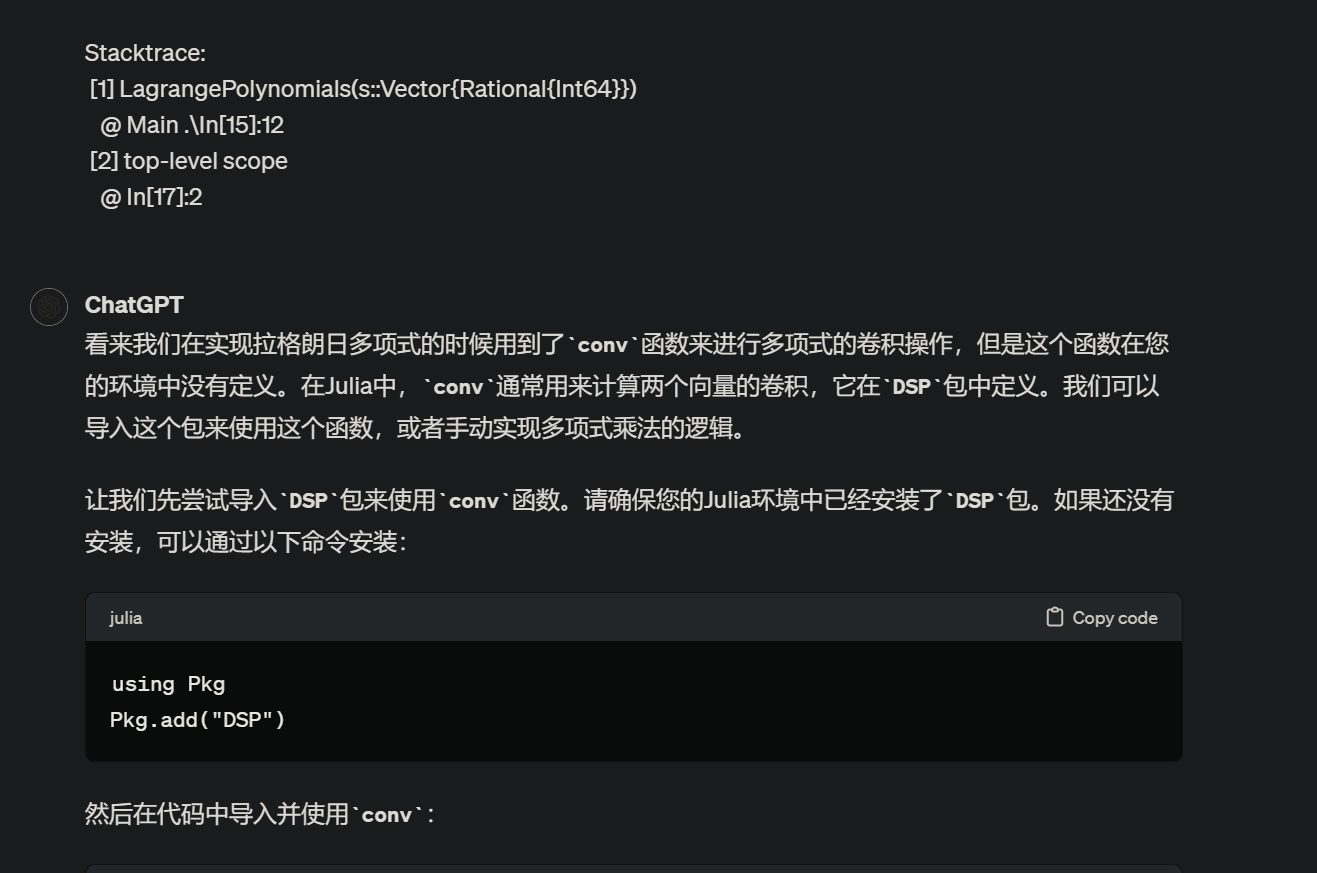

In [22]:
using Pkg
Pkg.add("DSP")

   Resolving package versions...
  No Changes to `C:\Users\Administrator\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Administrator\.julia\environments\v1.9\Manifest.toml`


In [23]:
function word_ladder(first_word::String, last_word::String)
    # 从文件中读取单词列表，这里需要替换为实际的文件路径
    word_list = readlines("路径/到/words.txt")  # 替换为实际路径

    # 只保留与输入单词长度相同的单词
    length_filter = length(first_word)
    word_list = filter(w -> length(w) == length_filter, word_list)

    # 调试：输出筛选后的单词列表大小，确保所需单词已包含在内
    println("筛选后的单词列表大小：", length(word_list))

    # 创建映射字典，将单词映射到它们的索引
    words_to_index = Dict(word => idx for (idx, word) in enumerate(word_list))

    # 调试：检查输入的单词是否在字典中
    println("首个单词在字典中吗？", haskey(words_to_index, first_word))
    println("最后一个单词在字典中吗？", haskey(words_to_index, last_word))

    # 如果输入单词不在字典中，返回错误消息或空路径
    if !haskey(words_to_index, first_word) || !haskey(words_to_index, last_word)
        return ["输入的单词必须包含在单词列表中。"]
    end

    # 初始化图的顶点
    vertices = [Vertex([]) for _ in word_list]

    # 通过比较单词创建图的边
    for i in 1:length(word_list)
        for j in 1:length(word_list)
            if i != j && one_letter_diff(word_list[i], word_list[j])
                push!(vertices[i].neighbors, j)
            end
        end
    end

    # 创建图
    graph = Graph(vertices)

    # 使用广度优先搜索找到最短路径
    start_idx = words_to_index[first_word]
    finish_idx = words_to_index[last_word]
    path_indices = shortest_path_bfs(graph, start_idx, finish_idx)

    # 将索引映射回单词
    return [word_list[idx] for idx in path_indices]
end

function one_letter_diff(word1::String, word2::String)
    # 检查两个单词是否只有一个字母不同
    sum([c1 != c2 for (c1, c2) in zip(word1, word2)]) == 1
end


one_letter_diff (generic function with 1 method)

In [24]:
d = 4
Ls = LagrangePolynomials((0:d) // d)
M = mkM(Ls)
K = mkK(Ls)
display(Ls)
display(M)
display(K)


LoadError: UndefVarError: `conv` not defined